## Visualization

This code creates the visualization of the results

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PATH_VISION_PRED = "../data/mimic-cxr-jpg/predictions_vision.csv"
PATH_COMBINED_PRED = "../data/mimic-cxr-jpg/predictions_combined.csv"
PATH_LABELS = "../data/mimic-cxr-jpg/labels.csv"

labels = pd.read_csv(PATH_LABELS)
vision_pred = pd.read_csv(PATH_VISION_PRED)
combined_pred = pd.read_csv(PATH_COMBINED_PRED)

## Visualization 1: bar chart of balanced accuracy per disease

In [45]:
# import balance_accuracy
from sklearn.metrics import balanced_accuracy_score

# each column of labels, vision_pred and combined_pred is a list of predictions for a specific disease. The disease is the column name.
# Compute the balanced accuracy for each disease and store it in a list
bal_acc_vision = []
bal_acc_combined = []
for col in labels.columns:
    print(col)
    bal_acc_vision.append(balanced_accuracy_score(labels[col], vision_pred[col]))
    bal_acc_combined.append(balanced_accuracy_score(labels[col], combined_pred[col]))


Atelectasis
Cardiomegaly
Consolidation
Edema
Enlarged Cardiomediastinum
Fracture
Lung Lesion
Lung Opacity
No Finding


c:\Users\alexs\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\alexs\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Pleural Effusion
Pleural Other
Pneumonia
Pneumothorax
Support Devices


In [49]:
bal_acc_combined

[0.6988774308219812,
 0.723918655719764,
 0.6101907682942874,
 0.718949283933104,
 0.5512979387996092,
 0.7886608798407581,
 0.5762272906892115,
 0.7145555953769124,
 0.7087517132132535,
 0.7387274326378371,
 0.5301063121328965,
 0.7681360121991228,
 0.8093998100999973,
 0.7942334853843586]

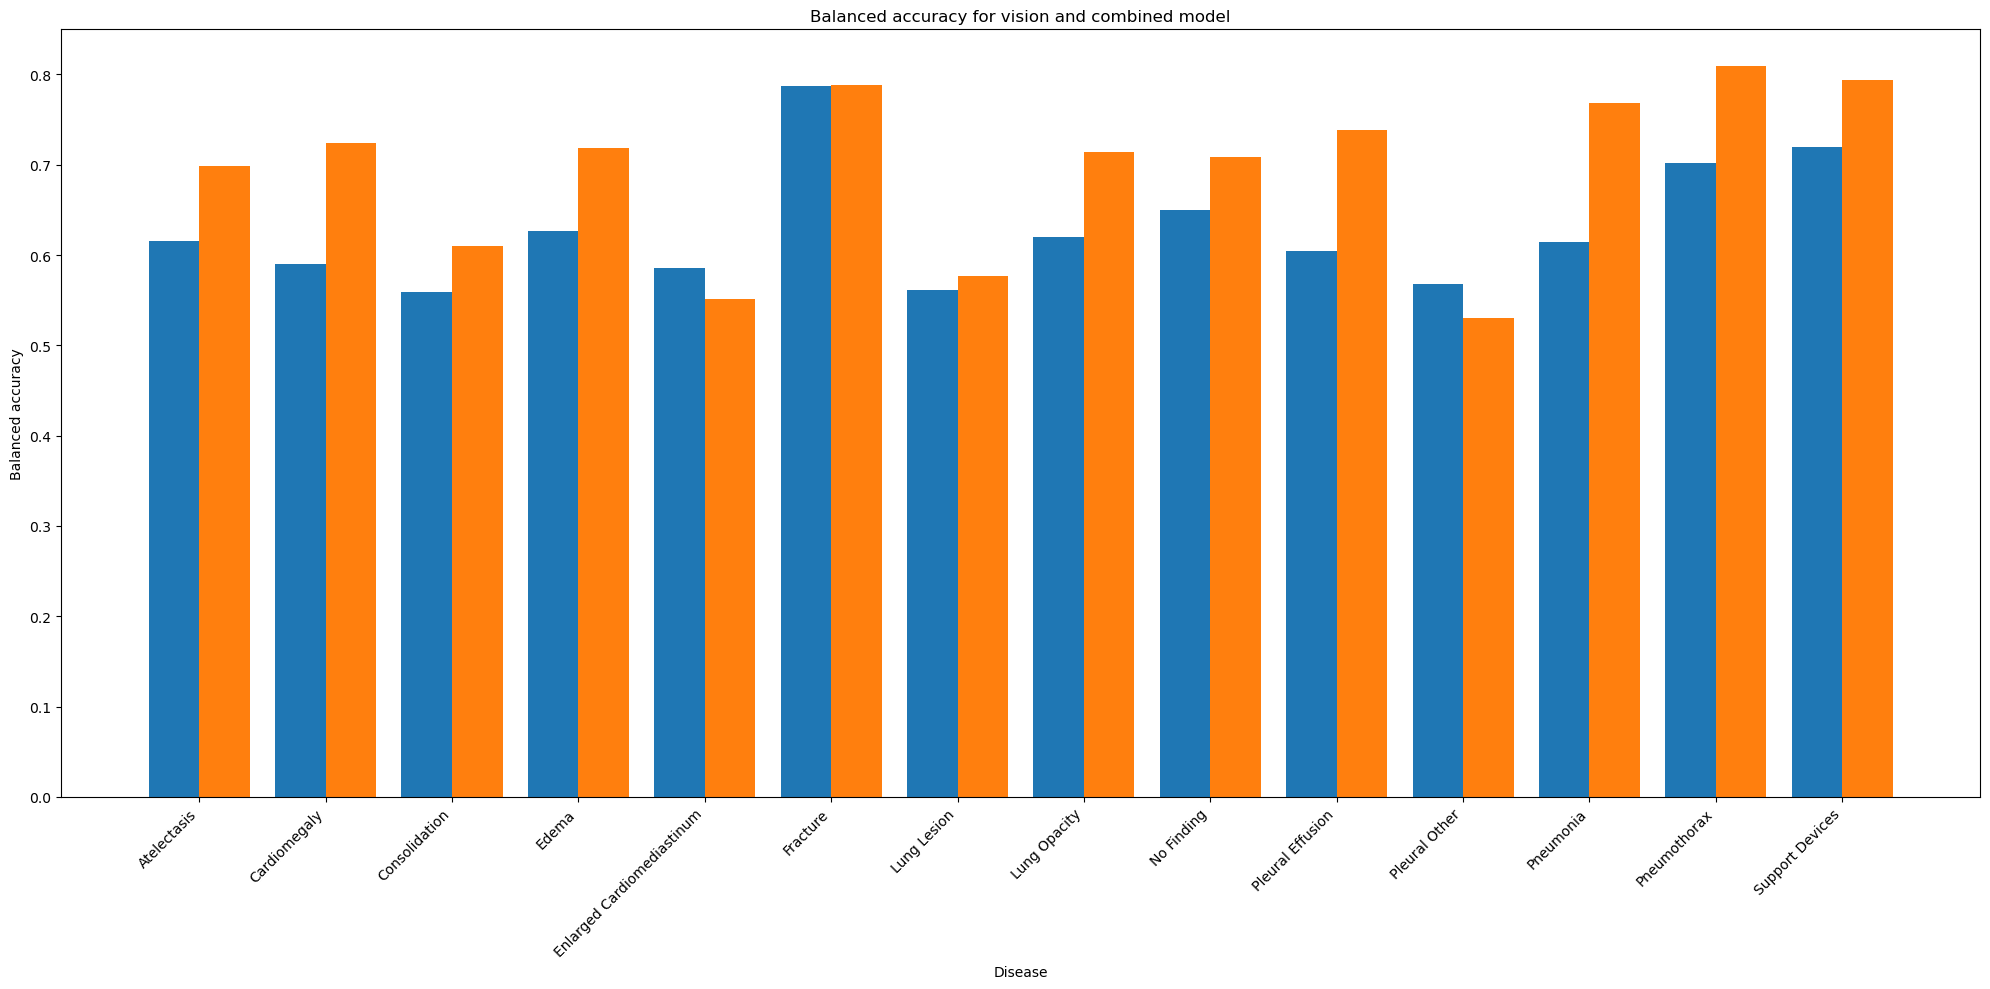

In [51]:
# Now create a barplot with 14 times 2 bars, one for vision and one for combined
# The x-axis should be the disease name
# The y-axis should be the balanced accuracy
# The bars should be colored differently
# The legend should contain the colors and the labels
# The title should be "Balanced accuracy for vision and combined model"

plt.figure(figsize=(20, 10))
plt.title("Balanced accuracy for vision and combined model")
plt.xlabel("Disease")
plt.ylabel("Balanced accuracy")

# For each disease, we want two bars side by side. The first one is the vision model, the second one is the combined model
# We want to plot the balanced accuracy for each model

# We need to create a list of x values. The first x value is 0, the second is 1, the third is 2, ...
# We can use range() for this
x = list(range(len(labels.columns)))
# We want to plot two bars for each x value. The first one is the vision model, the second one is the combined model
# We can use numpy.arange() for this
x_vision = np.arange(len(x))
x_combined = x_vision + 0.4

# Now we can plot the bars
plt.bar(x_vision, bal_acc_vision, width=0.4, label="Vision")
plt.bar(x_combined, bal_acc_combined, width=0.4, label="Combined")

# We need to set the xticks inbetween the bars
plt.xticks(x_vision + 0.2, labels.columns)

# If the x label is too long, make it display over two lines
plt.xticks(rotation=45, ha="right")
plt.tight_layout()



plt.show()



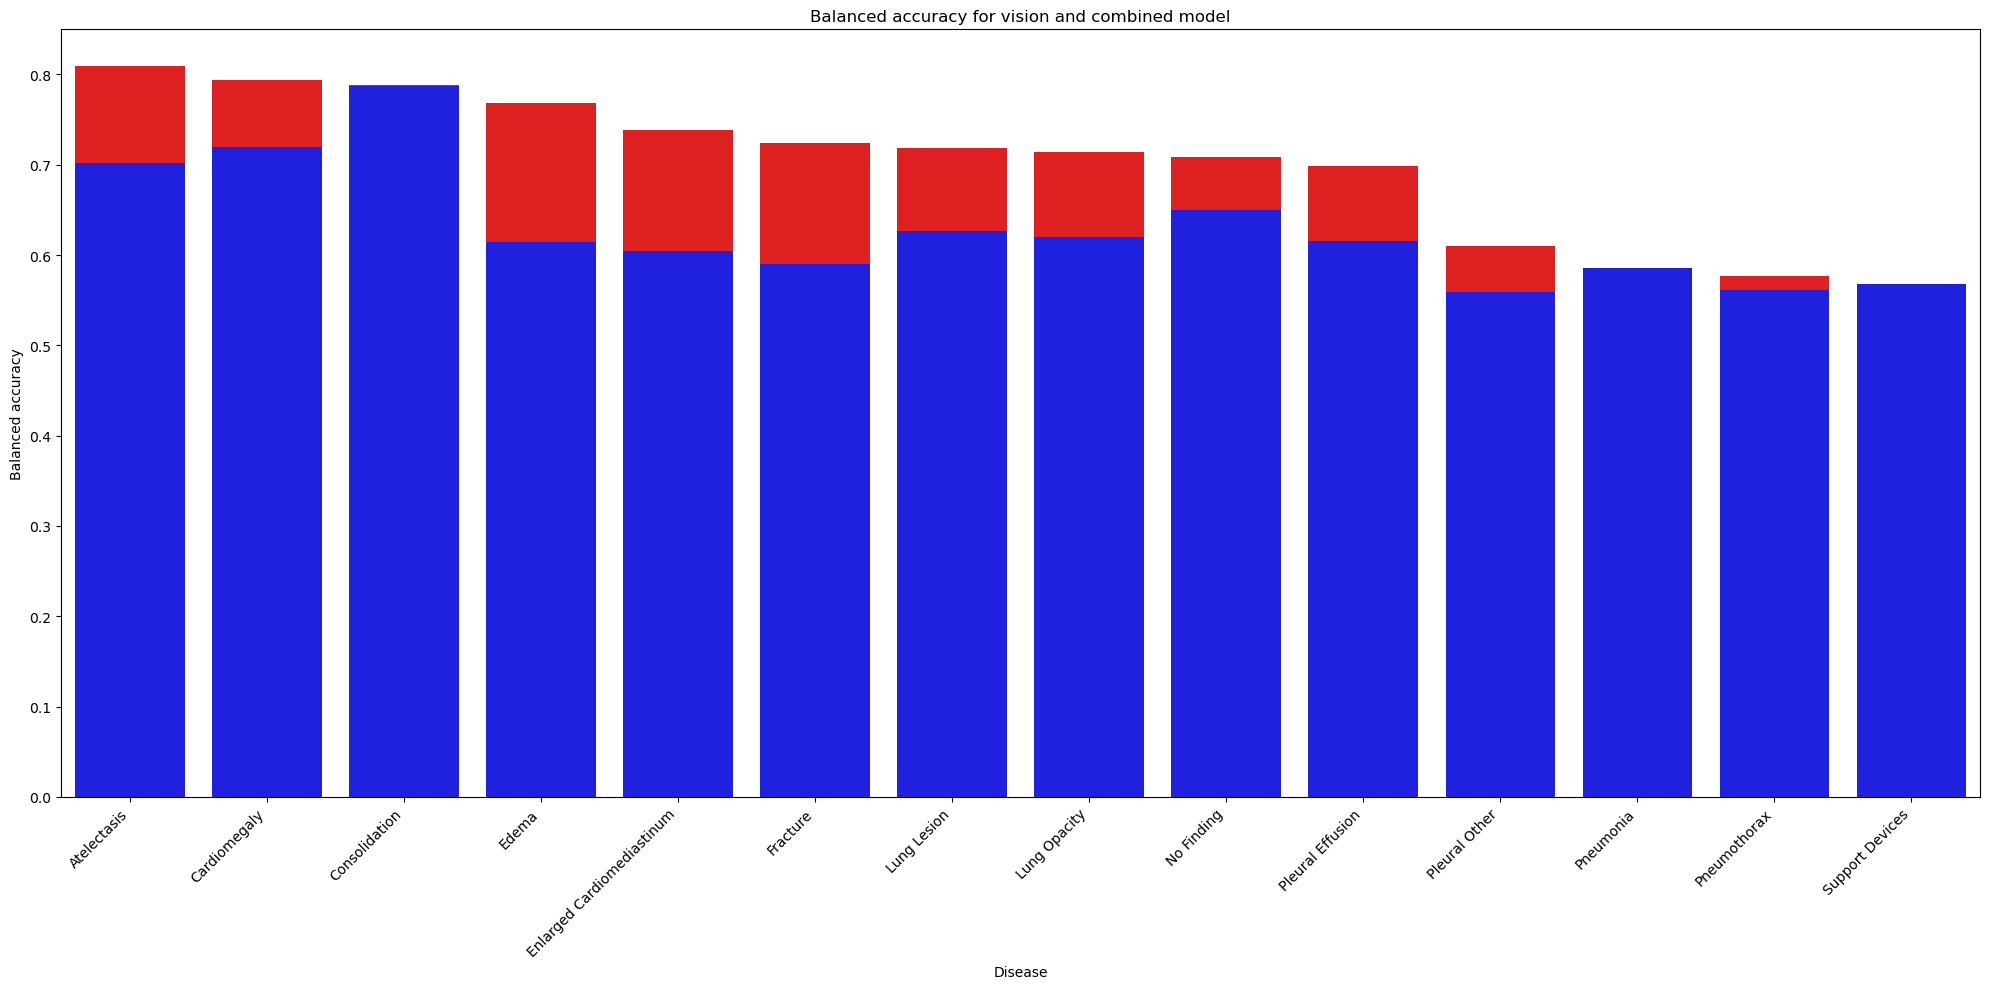

In [55]:
# Now do a similar plot, but with the bars stacked on top of each other, the vision model below and the combined model on top
# order the bars from top to bottom by the balanced accuracy of the combined model
# The legend should contain the colors and the labels

plt.figure(figsize=(20, 10))
plt.title("Balanced accuracy for vision and combined model")
plt.xlabel("Disease")
plt.ylabel("Balanced accuracy")

# For each disease, find the maximum balanced accuracy of the two models
max_bal_acc = [max(bal_acc_vision[i], bal_acc_combined[i]) for i in range(len(bal_acc_vision))]
order = np.argsort(max_bal_acc)[::-1]

ordered_bal_acc_combined = [bal_acc_combined[i] for i in order]
ordered_bal_acc_vision = [bal_acc_vision[i] for i in order]
diff = [ordered_bal_acc_combined[i] - ordered_bal_acc_vision[i] for i in range(len(ordered_bal_acc_combined))]

diff = [i if i > 0 else 0 for i in diff]

# create stacked bars using seaborn
sns.barplot(x=labels.columns, y=ordered_bal_acc_vision, color="b")
sns.barplot(x=labels.columns, y=diff, bottom=ordered_bal_acc_vision, color="r")





# We need to set the xticks inbetween the bars
plt.xticks(x, labels.columns)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


In [53]:
diff

[0.10779196942924862,
 0.07512120101693753,
 0.0018323699883667777,
 0.15425670459212093,
 0.13469280935692762,
 0.13375577364202573,
 0.09263429366480935,
 0.09438880551782303,
 0.05936728124116142,
 0.083480083792277,
 0.051237841767336034,
 -0.03485072824919455,
 0.014960603877343548,
 -0.03746961856349906]

## Plot 2

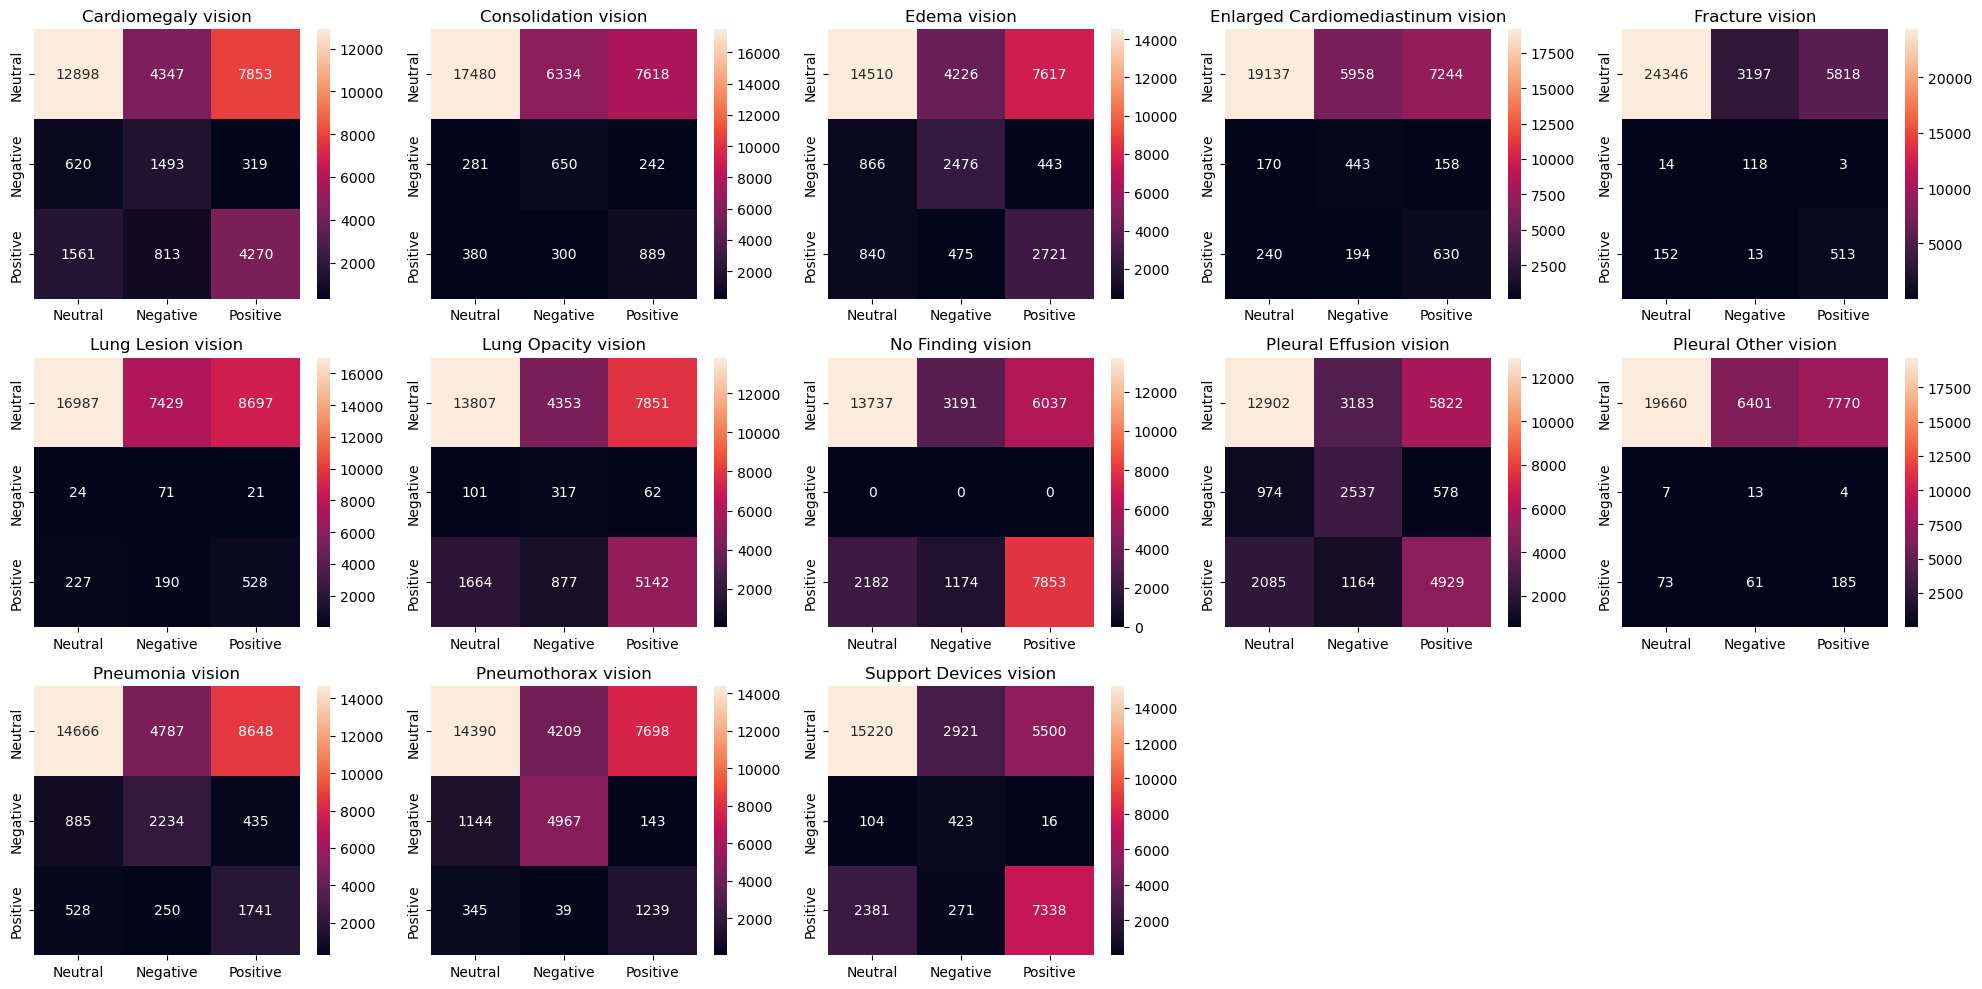

In [34]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
# I want a grid of 3 x 5, displaying sns heatmaps for each disease
# each heatmap is a confusion matrix of 3 x 3
# each heatmap should have a title with the disease name

# We need to create a figure with 3 rows and 5 columns
# We can use plt.subplots() for this
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

# We need to iterate over the axes and the diseases
# We can use zip() for this

for ax, col in zip(axes.flatten(), labels.columns[1:]):
    # create confusion matrix for vision model
    cm_vision = confusion_matrix(labels[col], vision_pred[col])
    # plot heatmap for vision model
    sns.heatmap(cm_vision, annot=True, fmt="d", ax=ax)
    ax.set_title(col + " vision")
    # replace y labels, -1: "Neutral", 0: "Negative", 1: "Positive"
    ax.set_yticklabels(["Neutral", "Negative", "Positive"])
    # replace x labels, -1: "Neutral", 0: "Negative", 1: "Positive"
    ax.set_xticklabels(["Neutral", "Negative", "Positive"])
    
# there are 2 empty plots, so we need to remove them
fig.delaxes(axes[2, 3])
fig.delaxes(axes[2, 4])


plt.tight_layout()
plt.show()
 




## Plot 3: precision-recall curves

In [ ]:
# For every disease, find the micro average precision and 